#Analysis

*Examined in total, the tweets, regardless of organization, were close to neutral

*At the time this was run (and it varied as I was testing), Fox News showed the most negative sentiment,
based on compound mean, and CNN the most positive

*All outlets had tweets that were near each extreme (positive or negative), but overall they appeared to balance out
resulting in the mean near zero

#Setup

In [57]:
import json
import tweepy 
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser


#Grab API Keys

In [58]:
file_name = "../../ClassExamples/api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [59]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#Sentiment Analyzer

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Dataframe and list initialization
#Tweet load
#Vader Analysis

In [61]:
sentiment_df=pd.DataFrame()
sentiment_mean_df=pd.DataFrame()

In [62]:
#the various companies have multiple twitter feeds, I selected the one that looked most like their "news" feed

target_user_list = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

tweet_texts = []
tweet_date = []
tweet_count = []
user_list = []

compound_list = []
positive_list = []
neutral_list = []
negative_list = []

compound_mean_list = []
positive_mean_list = []
negative_mean_list = []
neutral_mean_list = []
    
for target_user in target_user_list:
    # Counter
    counter = 1
    compound_sum = 0
    positive_sum = 0
    negative_sum = 0
    neutral_sum = 0
    
    # # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target_user, page=x)
        

        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
  
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
            tweet_texts.append(tweet["text"])
            tweet_count.append(counter)
            tweet_date.append(tweet["created_at"])
            user_list.append(target_user)

            compound_sum += compound
            positive_sum += pos
            neutral_sum += neu
            negative_sum += neg
            
            counter += 1

    compound_mean_list.append(compound_sum/(counter-1))
    positive_mean_list.append(positive_sum/(counter-1))
    neutral_mean_list.append(neutral_sum/(counter-1))
    negative_mean_list.append(negative_sum/(counter-1)) 
        
sentiment_df["User"] = user_list
sentiment_df["Tweet Number"] = tweet_count
sentiment_df["Tweet Date"] = tweet_date
sentiment_df["Compound"] = compound_list
sentiment_df["Positive"] = positive_list
sentiment_df["Neutral"] = neutral_list
sentiment_df["Negative"] = negative_list

sentiment_mean_df["User"] = target_user_list
sentiment_mean_df["Compound Mean"]=compound_mean_list
sentiment_mean_df["Positive Mean"]=positive_mean_list
sentiment_mean_df["Neutral Mean"]=neutral_mean_list    
sentiment_mean_df["Negative Mean"]=negative_mean_list


#Save to CSV & visually inspect

In [63]:
sentiment_df.to_csv("Media_Tweet_Sentiment.csv")
sentiment_df.head()

,User,Tweet Number,Tweet Date,Compound,Positive,Neutral,Negative
0,@BBCWorld,1,Mon Jan 29 22:19:40 +0000 2018,-0.3818,0.000,0.755,0.245
1,@BBCWorld,2,Mon Jan 29 22:03:43 +0000 2018,0.3612,0.328,0.458,0.214
2,@BBCWorld,3,Mon Jan 29 22:02:41 +0000 2018,-0.2023,0.000,0.921,0.079
3,@BBCWorld,4,Mon Jan 29 21:46:13 +0000 2018,0.3818,0.206,0.794,0.000
4,@BBCWorld,5,Mon Jan 29 20:57:26 +0000 2018,0.0000,0.000,1.000,0.000


#Check the dataframe holding the mean values

In [64]:
sentiment_mean_df

,User,Compound Mean,Positive Mean,Neutral Mean,Negative Mean
0,@BBCWorld,-0.029688,0.07731,0.79855,0.12415
1,@CBSNews,-0.037406,0.05669,0.87254,0.07077
2,@CNN,0.026612,0.06541,0.87540,0.05924
3,@FoxNews,-0.062224,0.05646,0.84374,0.09982
4,@nytimes,0.004836,0.08682,0.83454,0.07866


#Grab a tweet date to use for the plots & check formatting

In [65]:
Tweet_Date = parser.parse(sentiment_df["Tweet Date"][0])

print(f"Date {Tweet_Date:%B %d, %Y}")

Date January 29, 2018


#Bubble Chart

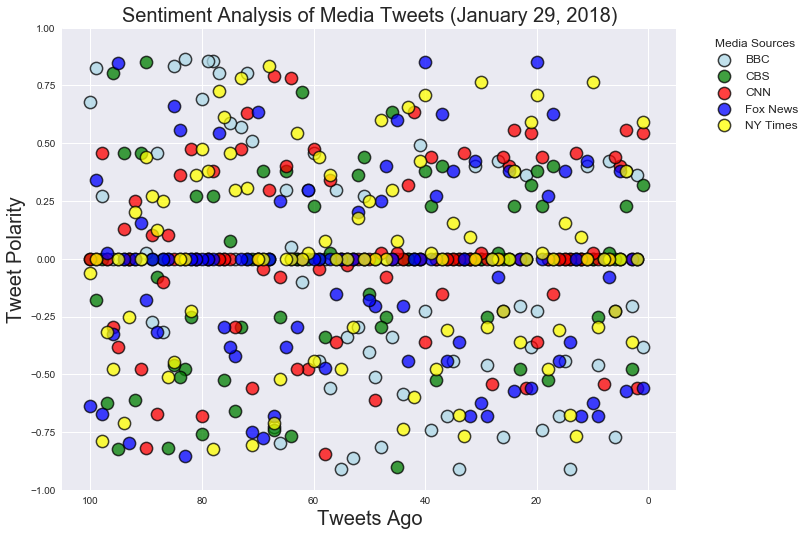

In [66]:
sns.set(rc={'figure.figsize':(11,8.5)})

sns.axes_style()

plt.xlim(105, -5)
plt.ylim(-1,1)

plt.title(f"Sentiment Analysis of Media Tweets ({Tweet_Date:%B %d, %Y})", fontsize = 20)
plt.xlabel("Tweets Ago", fontsize = 20)
plt.ylabel("Tweet Polarity", fontsize = 20)

BBC_handle=plt.scatter(sentiment_df.loc[sentiment_df["User"]=="@BBCWorld"]["Tweet Number"],
                       sentiment_df.loc[sentiment_df["User"]=="@BBCWorld"]["Compound"], s=150,
                       marker="o",facecolors="lightblue", edgecolors="black", alpha=0.75, linewidths = 1.5,label="BBC")
CBS_handle=plt.scatter(sentiment_df.loc[sentiment_df["User"]=="@CBSNews"]["Tweet Number"],
                       sentiment_df.loc[sentiment_df["User"]=="@CBSNews"]["Compound"], s=150,
                       marker="o",facecolors="green", edgecolors="black", alpha=0.75, linewidths = 1.5,label="CBS")
CNN_handle=plt.scatter(sentiment_df.loc[sentiment_df["User"]=="@CNN"]["Tweet Number"],
                       sentiment_df.loc[sentiment_df["User"]=="@CNN"]["Compound"], s=150,
                       marker="o",facecolors="red", edgecolors="black", alpha=0.75, linewidths = 1.5,label="CNN")
FoxNews_handle=plt.scatter(sentiment_df.loc[sentiment_df["User"]=="@FoxNews"]["Tweet Number"],
                       sentiment_df.loc[sentiment_df["User"]=="@FoxNews"]["Compound"], s=150,
                       marker="o",facecolors="blue", edgecolors="black", alpha=0.75, linewidths = 1.5,label="Fox News")
NYTimes_handle=plt.scatter(sentiment_df.loc[sentiment_df["User"]=="@nytimes"]["Tweet Number"],
                       sentiment_df.loc[sentiment_df["User"]=="@nytimes"]["Compound"], s=150,
                       marker="o",facecolors="yellow", edgecolors="black", alpha=0.75, linewidths = 1.5,label="NY Times")

plt.legend(handles=[BBC_handle, CBS_handle, CNN_handle, FoxNews_handle, NYTimes_handle],bbox_to_anchor=(1.04,1),
           loc="upper left",title="Media Sources", fontsize = 12)

plt.savefig ("Media Tweet Sentiment Analysis Bubble.png")
plt.show()

#Bar Chart

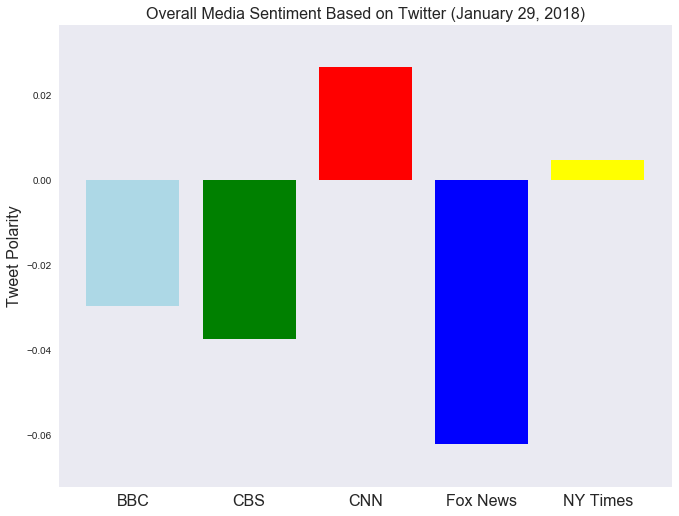

In [67]:
sns.set_style('dark')
labels = ["BBC", "CBS", "CNN", "Fox News", "NY Times"]
colors = ["lightblue", "green", "red", "blue", "yellow"]
x_axis = np.arange(len(labels))
plt.bar(x_axis, sentiment_mean_df["Compound Mean"],color = colors, align="edge")
plt.ylim (min(sentiment_mean_df["Compound Mean"])-.01, max(sentiment_mean_df["Compound Mean"]) + .01)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, labels,fontsize = 16)
              
plt.title(f"Overall Media Sentiment Based on Twitter ({Tweet_Date:%B %d, %Y})",fontsize = 16)
plt.ylabel("Tweet Polarity",fontsize = 16)

plt.savefig ("Overall Media Tweet Sentiment Analysis BarChart.png")
plt.show()